In [1]:
# imports
import numpy as np
import pandas as pd
import plotly.express as px

In [3]:
# dataset
population = (pd.read_csv("C:/Users/gael.lisador/Desktop/Hackathon/datavizreunion/population-francaise-communespublic.csv",encoding="ISO-8859-1",
                 sep="\t", na_values="-")
           .fillna(0)
          )

population.head()

,Code région,Nom de la région,Code département,Code arrondissement départemental,Code canton,Code_commune,Nom de la commune,Population municipale,Population comptée à part,Population totale,...,Code INSEE (commune ou arrondissement),Superficie de la commune,Statut,Code INSEE de la commune,Nom de la commune IGN,Nom du département IGN,Nom de la région.1,Code EPCI,Code EPCI.1,EPCI
0,4,La Réunion,974,3,31,419,Sainte-Rose,6809,71,6880,...,97419,178.21,Commune,97419,Sainte-Rose,LA REUNION,LA REUNION,0.0,0.0,0
1,4,La Réunion,974,2,5,405,Petite-Île,11582,109,11691,...,97405,33.83,Commune,97405,Petite-Île,LA REUNION,LA REUNION,0.0,0.0,0
2,4,La Réunion,974,3,6,402,Bras-Panon,12616,151,12767,...,97402,87.26,Commune,97402,Bras-Panon,LA REUNION,LA REUNION,249740093.0,249740093.0,CA Intercommunale de la Réunion Est
3,4,La Réunion,974,3,8,419,Sainte-Rose,6782,85,6867,...,97419,178.21,Commune,97419,Sainte-Rose,LA REUNION,LA REUNION,249740093.0,249740093.0,CA Intercommunale de la Réunion Est
4,4,La Réunion,974,3,90,410,Saint-Benoît,35733,238,35971,...,97410,229.79,Commune,97410,Saint-Benoît,LA REUNION,LA REUNION,0.0,0.0,0


In [ ]:
Répartition de la population/commune

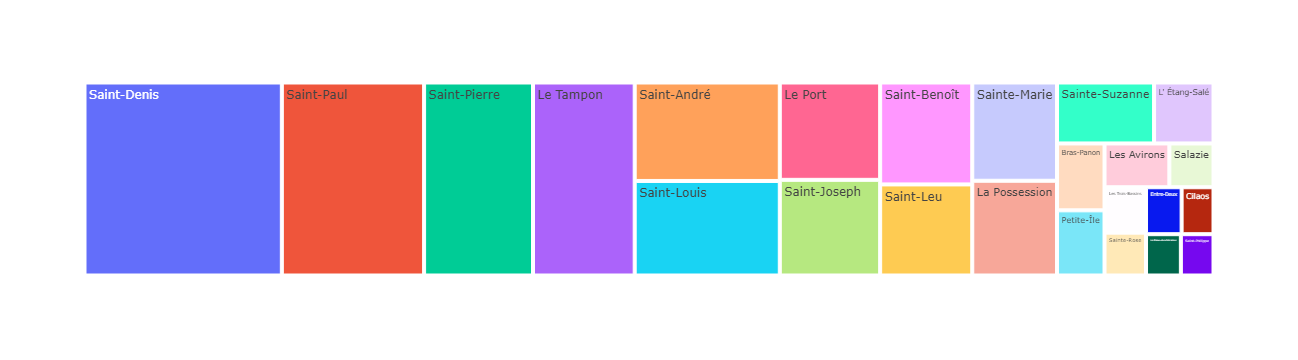

In [5]:
# treemap
px.treemap(population,
          path=["Nom de la commune"],
          values="Population totale")

In [6]:
px.treemap?

Signature:
px.treemap(
    data_frame=None,
    names=None,
    values=None,
    parents=None,
    ids=None,
    path=None,
    color=None,
    color_continuous_scale=None,
    range_color=None,
    color_continuous_midpoint=None,
    color_discrete_sequence=None,
    color_discrete_map=None,
    hover_name=None,
    hover_data=None,
    custom_data=None,
    labels=None,
    title=None,
    template=None,
    width=None,
    height=None,
    branchvalues=None,
    maxdepth=None,
) -> plotly.graph_objs._figure.Figure
Docstring:
    A treemap plot represents hierarchial data as nested rectangular
    sectors.
    
Parameters
----------
data_frame: DataFrame or array-like or dict
    This argument needs to be passed for column names (and not keyword
    names) to be used. Array-like and dict are tranformed internally to a
    pandas DataFrame. Optional: if missing, a DataFrame gets constructed
    under the hood using the other arguments.
names: str or int or Series or array-like
    Eit